Завдання до 2 лабораторної роботи:
Для поданої таблиці, що містить 56 спострержень з 8 вхідними факторами виконати кластеризацію запропонованими методами, вызуалізувати результати. Попередньо визначитись з кількістю класетрів для методів, які цього потребують:

Непарні номери варіантів:
1. Виконати кластеризацію методом Уорда
2. Виконати нечітку кластеризацію
3. Виконати кластеризацію методом Лямбда-Краб
4. Виконати кластеризацію методом SOM
5. Виконати кластеризацію методом Expectation-Maximization

Для датасету з країнами: Для кожного року виконати кластеризацію методом  К-середніх, прокоментувати - інтерпретувати результати та порівняти результати за різними роками.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [22]:
data = pd.read_excel("data.xlsx")  # <- параметр thousands=","
print(data.dtypes)

data['X3'] = data['X3'].astype(str)
data['X7'] = data['X7'].astype(str)

data['X3'] = data['X3'].str.replace(',', '.', regex=False)
data['X7'] = data['X7'].str.replace(',', '.', regex=False)

data = data.apply(pd.to_numeric, errors='coerce')
print("\n",data.dtypes)

№       int64
X1      int64
X2      int64
X3     object
X4      int64
X5      int64
X6      int64
X7     object
X8      int64
dtype: object

 №        int64
X1       int64
X2       int64
X3     float64
X4       int64
X5       int64
X6       int64
X7     float64
X8       int64
dtype: object


In [24]:
data

,№,X1,X2,X3,X4,X5,X6,X7,X8
0,1,6,150,1.8,24,30,120,3.4,15
1,2,7,150,1.8,24,30,120,9.7,5
2,3,6,170,1.8,24,30,120,7.4,23
3,4,7,170,1.8,24,30,120,10.6,8
4,5,6,150,2.4,24,30,120,6.5,20
5,6,7,150,2.4,24,30,120,7.9,9
6,7,6,170,2.4,24,30,120,10.3,13
7,8,7,170,2.4,24,30,120,9.5,5
8,9,6,150,1.8,36,30,120,14.3,23
9,10,7,150,1.8,36,30,120,10.5,1


In [40]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [56]:
def determine_optimal_clusters(data, max_k=10):
    """
    Визначення оптимальної кількості кластерів за допомогою кількох методів
    """
    print("=== ВИЗНАЧЕННЯ ОПТИМАЛЬНОЇ КІЛЬКОСТІ КЛАСТЕРІВ ===\n")
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Метод ліктя (Elbow Method)
    # print("1. МЕТОД ЛІКТЯ (ELBOW METHOD):")
    wcss = []  # Within-Cluster Sum of Squares
    k_range = range(2, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    
    # Знаходження "ліктя"
    differences = [wcss[i-1] - wcss[i] for i in range(1, len(wcss))]
    differences_ratio = [differences[i-1] / differences[i] if differences[i] != 0 else 0 
                        for i in range(1, len(differences))]
    
    optimal_k_elbow = differences_ratio.index(max(differences_ratio)) + 3
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.plot(k_range, wcss, 'bo-')
    plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('WCSS')
    plt.title('Метод ліктя')
    plt.grid(True)
    
    # Silhouette Score
    # print("\n2. SILHOUETTE ANALYSIS:")
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data_scaled)
        if len(set(labels)) > 1:  # Перевірка, що є хоча б 2 кластери
            score = silhouette_score(data_scaled, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(0)
    
    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
    # print(silhouette_scores[0], " ", silhouette_scores[2])
    plt.subplot(1, 4, 2)
    plt.plot(k_range, silhouette_scores, 'go-')
    plt.axvline(x=optimal_k_silhouette, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.grid(True)
    
    # Calinski-Harabasz Index
    # print("\n3. CALINSKI-HARABASZ INDEX:")
    ch_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data_scaled)
        if len(set(labels)) > 1:
            score = calinski_harabasz_score(data_scaled, labels)
            ch_scores.append(score)
        else:
            ch_scores.append(0)
    
    optimal_k_ch = k_range[np.argmax(ch_scores)]
    
    plt.subplot(1, 4, 3)
    plt.plot(k_range, ch_scores, 'mo-')
    plt.axvline(x=optimal_k_ch, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Index')
    plt.grid(True)
    
    # plt.tight_layout()
    # plt.show()
    
    # Davies-Bouldin Index (мінімізуємо)
    # print("\n4. DAVIES-BOULDIN INDEX (менше = краще):")
    db_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data_scaled)
        if len(set(labels)) > 1:
            score = davies_bouldin_score(data_scaled, labels)
            db_scores.append(score)
        else:
            db_scores.append(100)  # Дуже поганий результат
            
    optimal_k_db = k_range[np.argmin(db_scores)]
    plt.subplot(1, 4, 4)
    plt.plot(k_range, db_scores, 'mo-')
    plt.axvline(x= optimal_k_db, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Index')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    
    
    # Рекомендація
    recommendations = {
        'Метод ліктя': optimal_k_elbow,
        'Silhouette': optimal_k_silhouette,
        'Calinski-Harabasz': optimal_k_ch,
        'Davies-Bouldin': optimal_k_db
    }
    
    print("\n РЕКОМЕНДАЦІЇ ЩОДО КІЛЬКОСТІ КЛАСТЕРІВ:")
    for method, k in recommendations.items():
        print(f"{method}: {k} кластерів")
    
    # Середнє значення як фінальна рекомендація
    final_recommendation = int(np.round(np.mean(list(recommendations.values()))))
    print(f"\nФІНАЛЬНА РЕКОМЕНДАЦІЯ: {final_recommendation} кластерів")
    
    return final_recommendation, recommendations

=== ВИЗНАЧЕННЯ ОПТИМАЛЬНОЇ КІЛЬКОСТІ КЛАСТЕРІВ ===



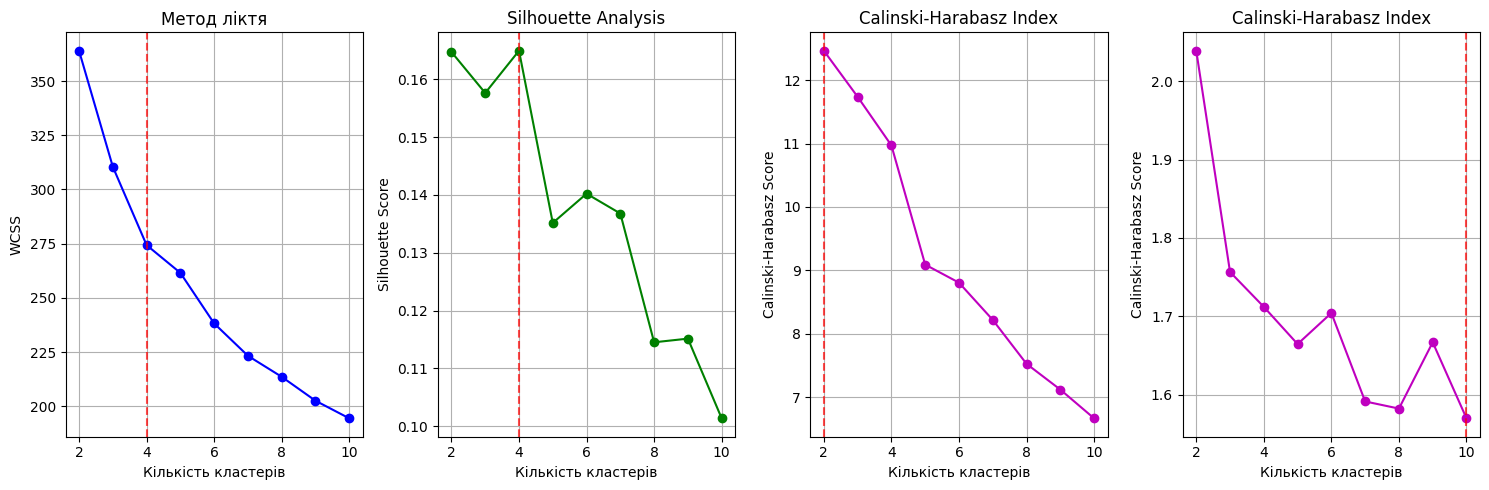


 РЕКОМЕНДАЦІЇ ЩОДО КІЛЬКОСТІ КЛАСТЕРІВ:
Метод ліктя: 4 кластерів
Silhouette: 4 кластерів
Calinski-Harabasz: 2 кластерів
Davies-Bouldin: 10 кластерів

ФІНАЛЬНА РЕКОМЕНДАЦІЯ: 5 кластерів


In [57]:
X = data.drop(columns = ["№"])
final_recommendation, recommendations = determine_optimal_clusters(X)

Кластеризація методом Уорда (Ward's Method)
Метод Уорда є одним з підходів до ієрархічної агломеративної кластеризації. На відміну від K-means, який розбиває дані на фіксовану кількість кластерів, ієрархічні методи будують деревовидну структуру кластерів (дендрограму), яка дозволяє досліджувати кластеризацію на різних рівнях деталізації.

Принцип роботи:

Початковий стан: Алгоритм починається з того, що кожна точка даних розглядається як окремий кластер.

Послідовне об'єднання: На кожному кроці алгоритм шукає два "найближчі" кластери та об'єднує їх в один. Цей процес повторюється, доки всі точки не будуть об'єднані в один великий кластер.

Критерій Уорда: Що робить метод Уорда унікальним, так це критерій, за яким визначається "близькість" кластерів. Він обирає для об'єднання ту пару кластерів, яка призводить до мінімального збільшення загальної внутрішньокластерної дисперсії (WCSS) або суми квадратів відстаней від кожної точки до центроїда її кластера. Іншими словами, метод Уорда намагається мінімізувати "втрату інформації" при об'єднанні кластерів, створюючи компактні та добре збалансовані кластери.

Переваги:
Не вимагає заздалегідь заданої кількості кластерів (k).
Надає повну ієрархію кластерів, що дозволяє гнучко вибирати рівень деталізації.
Схиляється до створення компактних, приблизно сферичних кластерів.

Недоліки:
Може бути обчислювально дорогим для великих наборів даних.
Чутливий до шуму та викидів.
Одного разу об'єднані кластери не можуть бути роз'єднані.

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

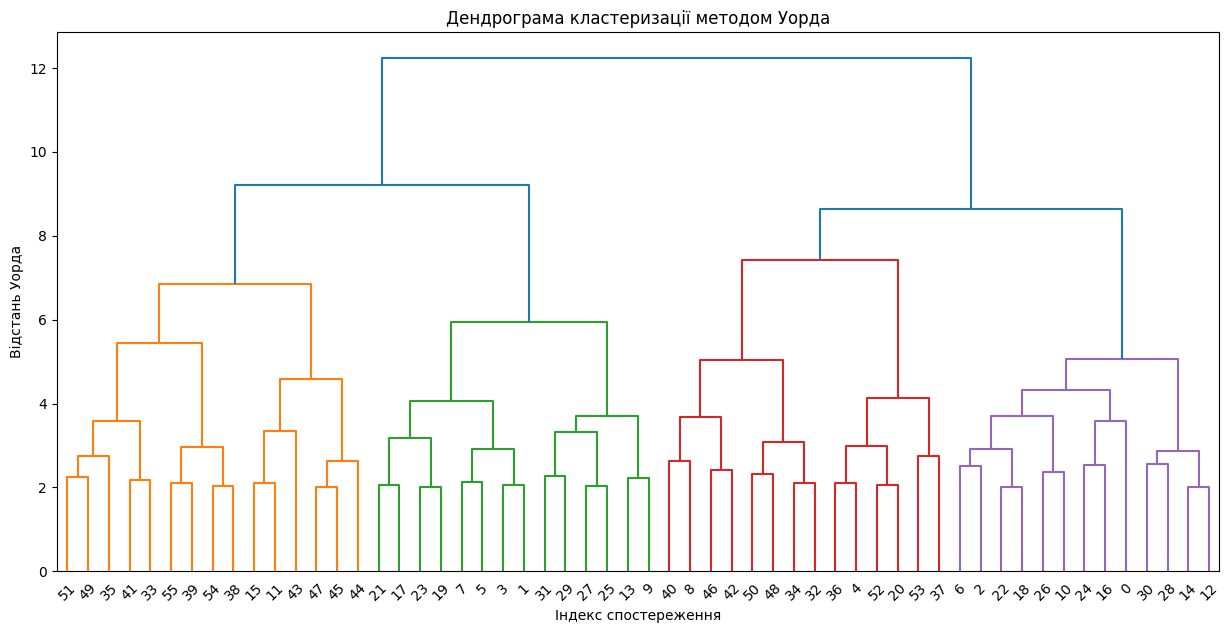

In [67]:
# Стандартизуємо дані (дуже важливо для ієрархічних методів)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Виконуємо кластеризацію методом Уорда
linked = linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(15, 7))
# Створення дендрограми
dendrogram(
    linked,
    orientation='top', # Відображення зверху вниз
    labels=X.index.tolist(), # Використовувати індекси об'єктів як мітки
    distance_sort='descending',
    show_leaf_counts=True,
    leaf_rotation=45.,       # Поворот міток на 45 градусів
    leaf_font_size=10.
)

plt.title('Дендрограма кластеризації методом Уорда')
plt.xlabel('Індекс спостереження')
plt.ylabel('Відстань Уорда')
plt.show()


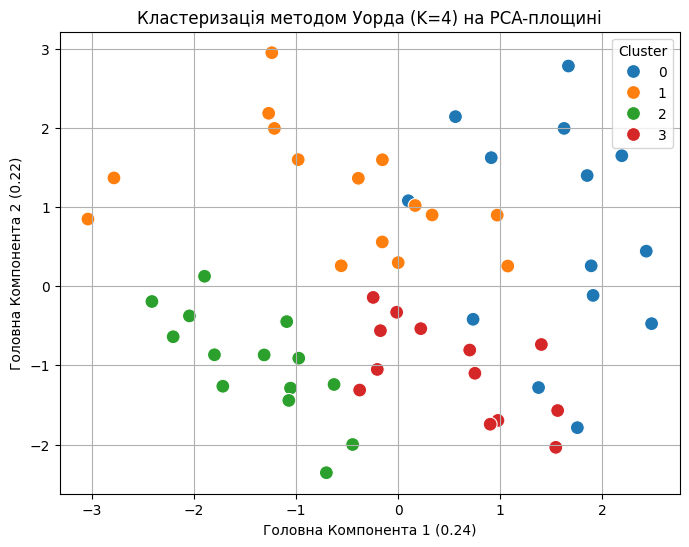

In [69]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns

# Визначте K на основі дендрограми
OPTIMAL_K = 4

# Застосування кластеризації для отримання міток
cluster = AgglomerativeClustering(n_clusters=OPTIMAL_K, linkage='ward')
cluster_labels = cluster.fit_predict(X_scaled)

# Зниження розмірності до 2D за допомогою PCA для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Візуалізація кластерів на площині головних компонент
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=pca_df, 
    palette=sns.color_palette("tab10", n_colors=OPTIMAL_K),
    legend='full',
    s=100
)
plt.title(f'Кластеризація методом Уорда (K={OPTIMAL_K}) на PCA-площині')
plt.xlabel(f'Головна Компонента 1 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Головна Компонента 2 ({pca.explained_variance_ratio_[1]:.2f})')
plt.grid(True)
plt.show()

# Нечітка кластеризація (Fuzzy Clustering)

Традиційні методи кластеризації (як-от K-Means або ієрархічна кластеризація) відносяться до категорії **"жорсткої" кластеризації**, де кожна точка даних належить **виключно до одного** кластера. Однак, у багатьох реальних сценаріях дані не мають чітких меж, і точка може мати характеристики, що відповідають кільком групам.

Нечітка кластеризація вирішує цю проблему, дозволяючи точкам даних належати до **кількох кластерів одночасно**, але з різним **ступенем приналежності (membership degree)**. Кожен ступінь приналежності є числом від 0 до 1, а сума ступенів приналежності однієї точки до всіх кластерів дорівнює 1.

## Fuzzy C-Means (FCM)

Найпоширенішим алгоритмом нечіткої кластеризації є **Fuzzy C-Means (FCM)**. Його робота схожа на K-Means, але замість жорсткого призначення, він оптимізує ступені приналежності та положення центроїдів.

### Принцип роботи FCM:

1.  **Ініціалізація:** Визначається бажана кількість кластерів $c$ та параметр "розмитості" $m$ (зазвичай $m=2$), який контролює ступінь "м'якості" кластерних меж. Початкові ступені приналежності та/або центроїди ініціалізуються випадковим чином.
2.  **Ітеративний процес:** Алгоритм повторює два основні кроки, доки не досягне конвергенції (тобто зміни стають незначними):
    *   **Оновлення центроїдів:** Центроїд кожного кластера $i$ обчислюється як зважене середнє всіх точок даних, де вагою є ступінь приналежності точки до цього кластера (піднесений до степеня $m$). Точки з вищим ступенем приналежності більше впливають на положення центроїда.
        $$ c_i = \frac{\sum_{j=1}^{N} (u_{ij})^m \cdot x_j}{\sum_{j=1}^{N} (u_{ij})^m} $$
    *   **Оновлення ступенів приналежності:** Для кожної точки даних обчислюються її нові ступені приналежності до кожного кластера. Ступінь приналежності є обернено пропорційним до відстані від точки до центроїда кластера. Чим ближче точка до центроїда, тим вищий її ступінь приналежності до цього кластера.
        $$ u_{ij} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d(x_j, c_i)}{d(x_j, c_k)}\right)^{\frac{2}{m-1}}} $$

### Візуалізація та інтерпретація:

Результати FCM можуть бути візуалізовані, показуючи не лише "основний" кластер, до якого належить точка, але й інтенсивність її приналежності до різних кластерів. Це дозволяє краще зрозуміти перехідні зони між кластерами.

### Переваги:

*   Дозволяє моделювати ситуації, де кластери перекриваються.
*   Надає більш детальну інформацію про взаємозв'язок точок з кластерами через ступені приналежності.
*   Корисна для аналізу даних з нечіткими або розмитими межами між групами.

### Недоліки:

*   Потребує попереднього задання кількості кластерів ($c$).
*   Чутлива до вибору початкових значень та параметра "розмитості" $m$.
*   Може бути обчислювально інтенсивнішою, ніж жорстка кластеризація.

In [107]:
import skfuzzy as fuzz

data_for_fcm = X_scaled.T
# data_for_fcm = X_scaled

# Вибір кількості кластерів 
n_clusters = 4
m = 1.5                    # Нечіткий показник (fuzziness exponent), зазвичай 2.0
max_iter = 5000            # Максимальна кількість ітерацій
error = 0.002              # Поріг зупинки

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_for_fcm, n_clusters, m, error=error, maxiter=max_iter, init=None
)

print(f"Коефіцієнт нечіткості поділу (FPC): {fpc:.4f}")
# Чим ближче FPC до 1, тим краще розділені кластери.

# Визначення "твердої" (crisp) належності:
# Призначаємо об'єкт до кластера, де його ступінь належності u_ik є максимальним
cluster_labels_fcm = u.argmax(axis=0)
# print(u)

Коефіцієнт нечіткості поділу (FPC): 0.4307


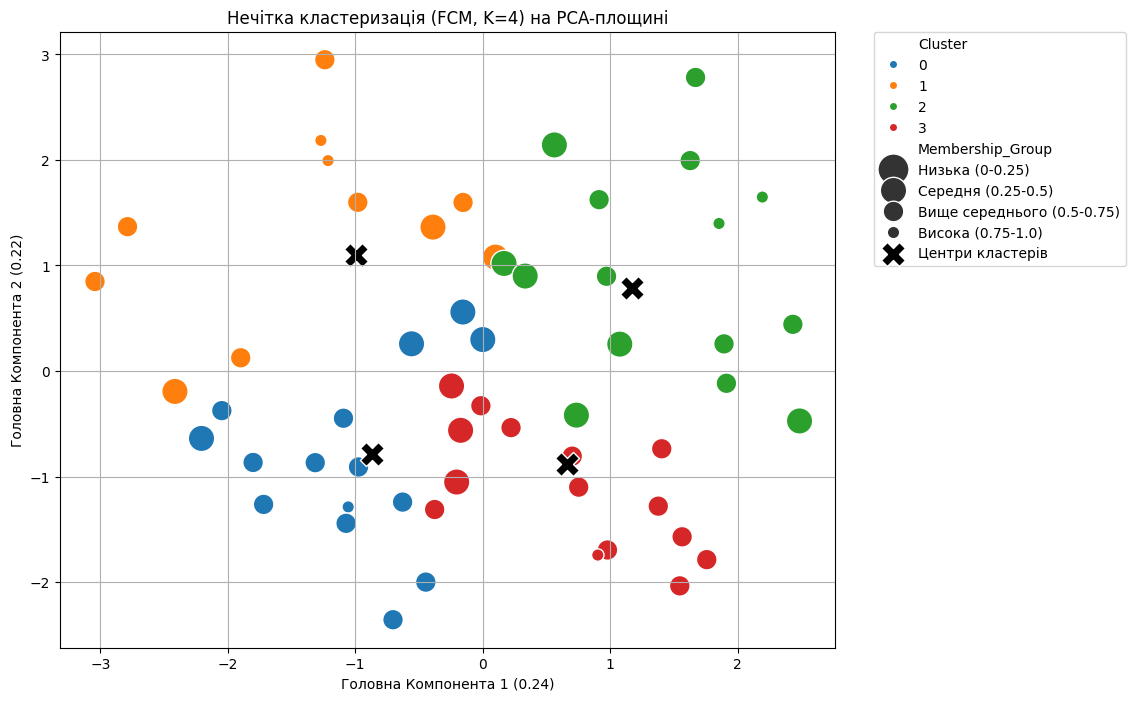

In [108]:
# Зниження розмірності (використовуємо той самий PCA, що і для Уорда)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels_fcm # Мітки "твердої" належності
pca_df['FCM_U_Max'] = u.max(axis=0)    # Максимальний ступінь належності

# Використовуємо вже навчений (fit) об'єкт PCA
centers_pca = pca.transform(cntr)
# Створюємо DataFrame для центрів
centers_df = pd.DataFrame(data=centers_pca, columns=['PC1', 'PC2'])
# Для зручності додамо мітки кластерів
centers_df['Cluster'] = centers_df.index
# Переконаємось, що тип даних відповідає типу 'Cluster' в pca_df (це важливо для коректного відображення кольорів)
centers_df['Cluster'] = centers_df['Cluster'].astype(pca_df['Cluster'].dtype)

plt.figure(figsize=(10, 8))

bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = ['Низька (0-0.25)', 'Середня (0.25-0.5)', 'Вище середнього (0.5-0.75)', 'Висока (0.75-1.0)']

# Використовуємо pd.cut для категоризації неперервних значень
pca_df['Membership_Group'] = pd.cut(
    pca_df['FCM_U_Max'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)
# Визначаємо фактичну кількість унікальних кластерів для палітри
N_CLUSTERS = pca_df['Cluster'].nunique()



# Візуалізація: кольори - кластери, розмір точки - ступінь належності
scatter = sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    size='Membership_Group', # <<< ВИКОРИСТОВУЄМО КАТЕГОРІАЛЬНУ ЗМІННУ ДЛЯ РОЗМІРУ
    data=pca_df, 
    # Встановлюємо палітру, яка точно відповідає N_CLUSTERS
    palette=sns.color_palette("tab10", n_colors=N_CLUSTERS), 
    legend='full',
    sizes=(80, 500) # Розширюємо діапазон розмірів для більшої наочності
)

plt.scatter(
    centers_df['PC1'],
    centers_df['PC2'],
    marker='X', # Використовуємо маркер 'X'
    s=300,       # Збільшений розмір
    color='black', # Колір центрів (наприклад, чорний)
    edgecolors='white', # Біла обведення для контрасту
    label='Центри кластерів' # Додаємо до легенди
)

plt.title(f'Нечітка кластеризація (FCM, K={n_clusters}) на PCA-площині')
plt.xlabel(f'Головна Компонента 1 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Головна Компонента 2 ({pca.explained_variance_ratio_[1]:.2f})')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform

class LambdaCrab:
    """
    Реалізація алгоритму Лямбда-Краб для кластеризації
    """
    
    def __init__(self, lambda_param=0.5, max_iter=100, tol=1e-6):
        self.lambda_param = lambda_param  # Параметр радіусу
        self.max_iter = max_iter
        self.tol = tol
        self.clusters_ = None
        self.centers_ = None
        
    def fit(self, X):
        """
        Виконання кластеризації методом Лямбда-Краб
        """
        n_samples, n_features = X.shape
        self.X = X.copy()
        
        # Ініціалізація
        unassigned = set(range(n_samples))
        clusters = []
        centers = []
        
        # Розрахунок матриці відстаней
        distances = pairwise_distances(X)
        
        iteration = 0
        while unassigned and iteration < self.max_iter:
            # Вибираємо випадковий нерозподілений об'єкт
            if not unassigned:
                break
                
            center_idx = np.random.choice(list(unassigned))
            center = X[center_idx]
            
            # Знаходимо об'єкти в радіусі lambda
            cluster_indices = self._find_points_in_radius(center_idx, distances, unassigned)
            
            if cluster_indices:
                # Створюємо новий кластер
                clusters.append(cluster_indices)
                centers.append(center)
                
                # Видаляємо призначені об'єкти
                unassigned -= set(cluster_indices)
            
            iteration += 1
        
        # Обробка залишкових точок
        if unassigned:
            self._assign_remaining_points(unassigned, clusters, distances)
        
        self.clusters_ = clusters
        self.centers_ = np.array(centers)
        self.labels_ = self._create_labels(n_samples)
        
        return self
    
    def _find_points_in_radius(self, center_idx, distances, unassigned):
        """
        Знаходження точок в радіусі lambda від центру
        """
        # Автоматичне визначення lambda, якщо не задано
        if self.lambda_param is None:
            all_distances = distances[center_idx][list(unassigned)]
            self.lambda_param = np.percentile(all_distances, 30)
        
        # Знаходимо точки в радіусі
        cluster_indices = []
        for idx in unassigned:
            if distances[center_idx, idx] <= self.lambda_param:
                cluster_indices.append(idx)
        
        return cluster_indices
    
    def _assign_remaining_points(self, unassigned, clusters, distances):
        """
        Призначення точок, що залишилися, до найближчих кластерів
        """
        for point_idx in unassigned:
            min_dist = float('inf')
            best_cluster = -1
            
            for i, cluster in enumerate(clusters):
                # Відстань до найближчої точки в кластері
                cluster_dists = distances[point_idx][cluster]
                min_cluster_dist = np.min(cluster_dists)
                
                if min_cluster_dist < min_dist:
                    min_dist = min_cluster_dist
                    best_cluster = i
            
            if best_cluster != -1:
                clusters[best_cluster].append(point_idx)
    
    def _create_labels(self, n_samples):
        """
        Створення міток кластерів
        """
        labels = np.full(n_samples, -1)
        for cluster_idx, cluster in enumerate(self.clusters_):
            for point_idx in cluster:
                labels[point_idx] = cluster_idx
        return labels
    
    def predict(self, X):
        """
        Передбачення кластерів для нових даних
        """
        distances = pairwise_distances(X, self.centers_)
        return np.argmin(distances, axis=1)

def lambda_crab_clustering(data, lambda_param=None, auto_lambda=True):
    """
    Функція для кластеризації методом Лямбда-Краб
    """
    print("=== КЛАСТЕРИЗАЦІЯ МЕТОДОМ ЛЯМБДА-КРАБ ===\n")
    
    # Стандартизація даних
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Автоматичний підбір lambda
    if auto_lambda or lambda_param is None:
        lambda_param = estimate_optimal_lambda(data_scaled)
        print(f"Автоматично обраний параметр lambda: {lambda_param:.4f}")
    
    # Виконання кластеризації
    lambda_crab = LambdaCrab(lambda_param=lambda_param)
    lambda_crab.fit(data_scaled)
    
    # Отримуємо результати
    labels = lambda_crab.labels_
    clusters = lambda_crab.clusters_
    n_clusters = len(clusters)
    
    print(f"Кількість кластерів: {n_clusters}")
    print(f"Параметр lambda: {lambda_param:.4f}")
    
    # Додаємо результати до даних
    data_with_clusters = data.copy()
    data_with_clusters['Cluster_LambdaCrab'] = labels
    
    # Аналіз розмірів кластерів
    cluster_sizes = data_with_clusters['Cluster_LambdaCrab'].value_counts().sort_index()
    print(f"\nРозміри кластерів:")
    for cluster, size in cluster_sizes.items():
        print(f"Кластер {cluster}: {size} спостережень")
    
    return data_with_clusters, lambda_crab, n_clusters

def estimate_optimal_lambda(data, percentile_range=range(10, 51, 5)):
    """
    Оцінка оптимального значення lambda
    """
    distances = pdist(data)
    lambda_values = []
    quality_scores = []
    
    for percentile in percentile_range:
        lambda_val = np.percentile(distances, percentile)
        lambda_crab = LambdaCrab(lambda_param=lambda_val)
        
        try:
            lambda_crab.fit(data)
            n_clusters = len(lambda_crab.clusters_)
            
            # Оцінка якості (більше кластерів - краще, але не занадто багато)
            if n_clusters > 1 and n_clusters < len(data) // 2:
                quality = n_clusters / (1 + np.std([len(c) for c in lambda_crab.clusters_]))
                lambda_values.append(lambda_val)
                quality_scores.append(quality)
        except:
            continue
    
    if quality_scores:
        best_idx = np.argmax(quality_scores)
        return lambda_values[best_idx]
    else:
        # Повертаємо медіанну відстань
        return np.median(distances)

In [113]:
def visualize_lambda_crab_results(data, lambda_crab, n_clusters):
    """
    Візуалізація результатів кластеризації Лямбда-Краб
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # PCA для візуалізації
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)
    
    # Центри кластерів у PCA просторі
    centers_pca = pca.transform(lambda_crab.centers_)
    
    labels = lambda_crab.labels_
    
    # Створюємо велику фігуру
    fig = plt.figure(figsize=(18, 12))
    
    # 1. Основна візуалізація кластерів
    ax1 = plt.subplot(2, 3, 1)
    scatter = ax1.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, 
                         cmap='viridis', s=60, alpha=0.7)
    
    # Відображаємо центри кластерів
    ax1.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', 
               s=200, label='Центри кластерів', edgecolors='black', linewidth=2)
    
    # Додаємо кола радіусу lambda навколо центрів
    for center in centers_pca:
        circle = plt.Circle(center, lambda_crab.lambda_param, color='red', 
                           alpha=0.1, linestyle='--', fill=False)
        ax1.add_patch(circle)
    
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    ax1.set_title('Кластеризація Лямбда-Краб\n(кола - радіус λ)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label='Кластер')
    
    # 2. Розподіл розмірів кластерів
    ax2 = plt.subplot(2, 3, 2)
    cluster_sizes = [len(cluster) for cluster in lambda_crab.clusters_]
    ax2.bar(range(1, n_clusters + 1), cluster_sizes, color='lightblue', alpha=0.7)
    ax2.set_xlabel('Кластер')
    ax2.set_ylabel('Кількість спостережень')
    ax2.set_title('Розподіл розмірів кластерів')
    ax2.grid(True, alpha=0.3)
    
    # Додаємо номери спостережень на стовпці
    for i, size in enumerate(cluster_sizes):
        ax2.text(i + 1, size + 0.1, str(size), ha='center', va='bottom')
    
    # 3. Вплив параметра lambda
    ax3 = plt.subplot(2, 3, 3)
    lambda_values = np.linspace(lambda_crab.lambda_param * 0.5, 
                               lambda_crab.lambda_param * 2, 20)
    n_clusters_list = []
    
    for lambda_val in lambda_values:
        try:
            lc_test = LambdaCrab(lambda_param=lambda_val)
            lc_test.fit(data_scaled)
            n_clusters_list.append(len(lc_test.clusters_))
        except:
            n_clusters_list.append(0)
    
    ax3.plot(lambda_values, n_clusters_list, 'bo-', linewidth=2)
    ax3.axvline(x=lambda_crab.lambda_param, color='red', linestyle='--', 
                label=f'Обраний λ = {lambda_crab.lambda_param:.3f}')
    ax3.set_xlabel('Параметр λ')
    ax3.set_ylabel('Кількість кластерів')
    ax3.set_title('Вплив параметра λ на кількість кластерів')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Heatmap відстаней між кластерами
    ax4 = plt.subplot(2, 3, 4)
    cluster_distances = pairwise_distances(lambda_crab.centers_)
    sns.heatmap(cluster_distances, annot=True, cmap='coolwarm', ax=ax4,
                xticklabels=range(1, n_clusters + 1), 
                yticklabels=range(1, n_clusters + 1))
    ax4.set_title('Відстані між центрами кластерів')
    ax4.set_xlabel('Кластер')
    ax4.set_ylabel('Кластер')
    
    # 5. Внутрішньокластерні відстані
    ax5 = plt.subplot(2, 3, 5)
    intra_cluster_distances = []
    for i, cluster in enumerate(lambda_crab.clusters_):
        if len(cluster) > 1:
            cluster_data = data_scaled[cluster]
            cluster_dist = pdist(cluster_data)
            intra_cluster_distances.append(np.mean(cluster_dist))
        else:
            intra_cluster_distances.append(0)
    
    ax5.bar(range(1, n_clusters + 1), intra_cluster_distances, 
            color='lightgreen', alpha=0.7)
    ax5.axhline(y=lambda_crab.lambda_param, color='red', linestyle='--',
                label=f'λ = {lambda_crab.lambda_param:.3f}')
    ax5.set_xlabel('Кластер')
    ax5.set_ylabel('Середня внутрішня відстань')
    ax5.set_title('Внутрішньокластерна компактність')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Початкові точки для кожного кластера
    ax6 = plt.subplot(2, 3, 6)
    initial_points = [cluster[0] for cluster in lambda_crab.clusters_]
    ax6.scatter(data_pca[:, 0], data_pca[:, 1], c='lightgray', s=30, alpha=0.3)
    ax6.scatter(data_pca[initial_points, 0], data_pca[initial_points, 1], 
               c=range(n_clusters), cmap='viridis', s=100, marker='*', 
               edgecolors='black')
    ax6.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    ax6.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    ax6.set_title('Початкові точки кластерів (зірки)')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

=== КЛАСТЕРИЗАЦІЯ МЕТОДОМ ЛЯМБДА-КРАБ ===

Автоматично обраний параметр lambda: 2.8745
Кількість кластерів: 18
Параметр lambda: 2.8745

Розміри кластерів:
Кластер 0: 8 спостережень
Кластер 1: 3 спостережень
Кластер 2: 4 спостережень
Кластер 3: 6 спостережень
Кластер 4: 6 спостережень
Кластер 5: 4 спостережень
Кластер 6: 1 спостережень
Кластер 7: 7 спостережень
Кластер 8: 3 спостережень
Кластер 9: 2 спостережень
Кластер 10: 3 спостережень
Кластер 11: 1 спостережень
Кластер 12: 2 спостережень
Кластер 13: 1 спостережень
Кластер 14: 2 спостережень
Кластер 15: 1 спостережень
Кластер 16: 1 спостережень
Кластер 17: 1 спостережень


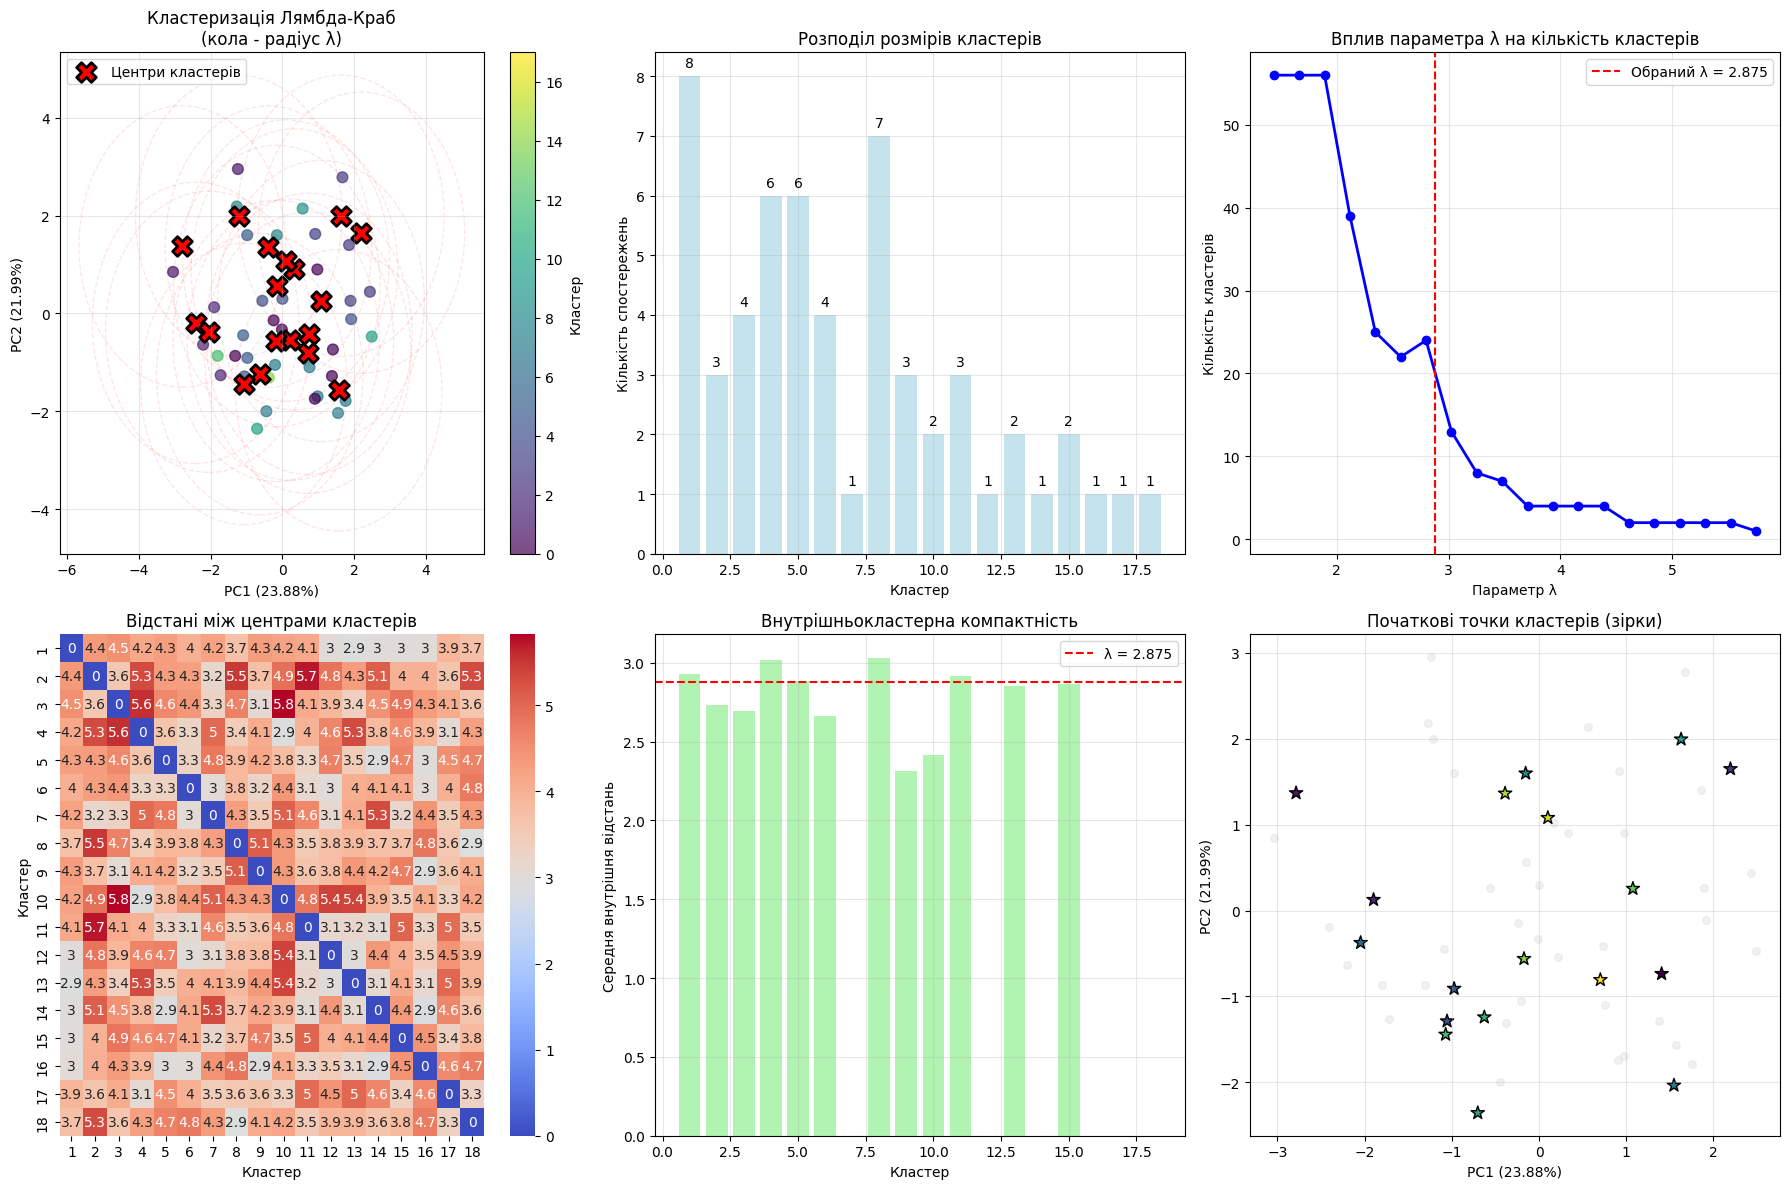

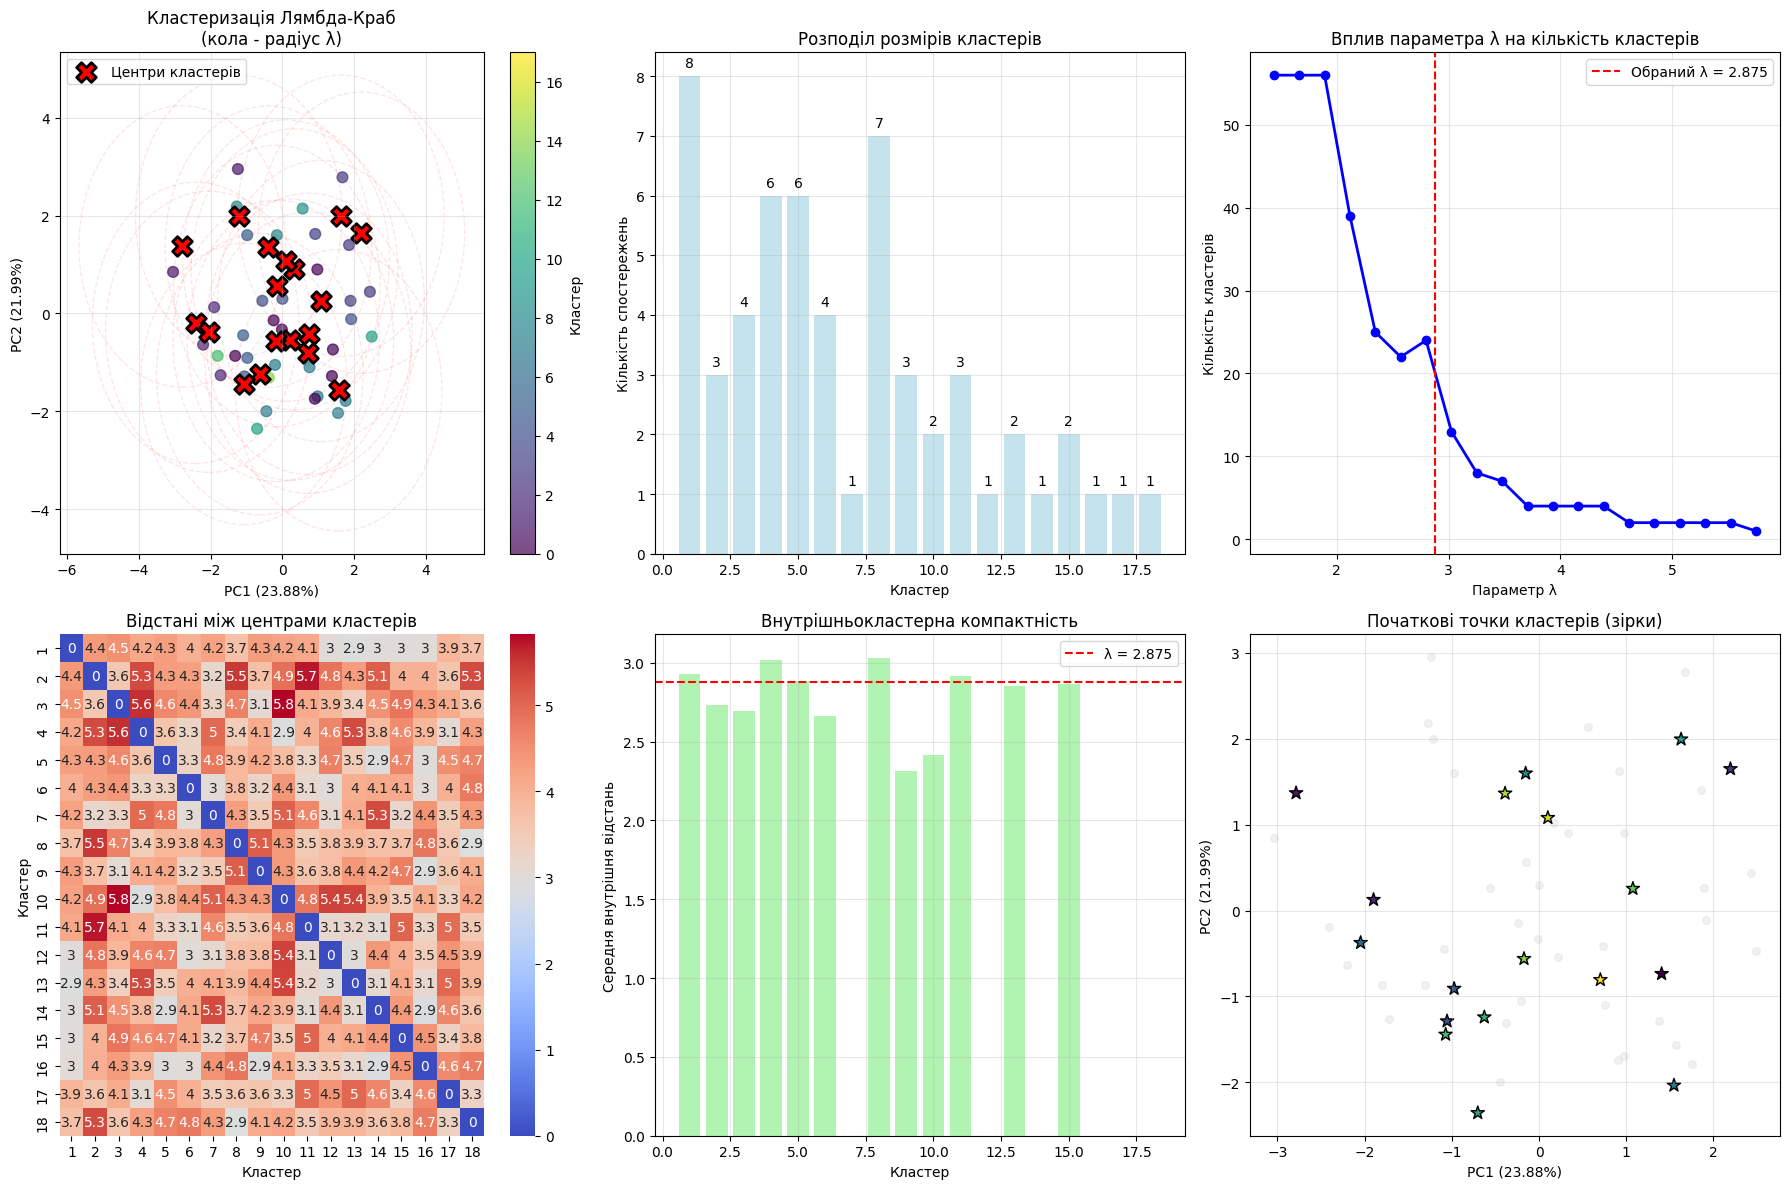

In [115]:
# Виконання кластеризації Лямбда-Краб
data_with_clusters, lambda_crab, n_clusters = lambda_crab_clustering(X, auto_lambda=True)
    
# Візуалізація результатів
visualize_lambda_crab_results(X, lambda_crab, n_clusters)